### **0. Set-up**

In [39]:
# Import libraries and utils
%run '../../utils.ipynb'

In [40]:
# Load predicted
raw_predicted = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/en/f7.csv")

# Load actual
raw_actual = pd.read_csv("../../../data/dataset/cleaned-en-simlex-999.csv")

In [41]:
# Show results
raw_predicted

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.1,0.1,1.0,0.2,0.1,2.0,0.1,0.2,0.10,0.2,0.1,0.1,0.1,3.0,1.0
1,smart,intelligent,0.9,0.9,1.0,0.9,0.9,9.0,0.9,0.9,0.90,0.9,0.9,0.9,0.9,9.0,0.9
2,hard,difficult,0.3,0.8,0.5,0.7,0.8,7.0,0.8,0.7,0.20,0.9,0.2,0.4,0.9,6.0,0.8
3,happy,cheerful,0.8,0.7,0.2,0.6,0.7,8.0,0.8,0.8,0.90,0.8,0.9,0.8,0.7,6.0,0.7
4,hard,easy,0.1,0.1,0.2,0.1,0.1,3.0,0.1,0.4,0.10,0.1,0.1,0.2,0.1,2.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,1.0,9.0,0.3,0.1,1.0,0.0,0.0,1.0,0.20,1.0,0.0,0.1,0.0,1.0,0.7
995,send,attend,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.1,0.0,0.0,0.1
996,gather,attend,1.0,0.0,0.8,0.1,1.0,0.0,0.0,0.5,0.10,1.0,0.0,0.1,0.0,0.0,0.7
997,absorb,withdraw,0.0,0.0,0.2,0.1,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.1,0.0,0.0,0.3


### **1. Data Quality**

In [42]:
# Basic info
raw_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   word1                999 non-null    object 
 1   word2                999 non-null    object 
 2   similarity_score_1   999 non-null    float64
 3   similarity_score_2   999 non-null    float64
 4   similarity_score_3   999 non-null    float64
 5   similarity_score_4   999 non-null    float64
 6   similarity_score_5   999 non-null    float64
 7   similarity_score_6   999 non-null    float64
 8   similarity_score_7   999 non-null    float64
 9   similarity_score_8   999 non-null    float64
 10  similarity_score_9   999 non-null    float64
 11  similarity_score_10  999 non-null    float64
 12  similarity_score_11  999 non-null    float64
 13  similarity_score_12  999 non-null    float64
 14  similarity_score_13  999 non-null    float64
 15  similarity_score_14  999 non-null    flo

In [43]:
# Missing values per column
raw_predicted.isnull().sum()

word1                  0
word2                  0
similarity_score_1     0
similarity_score_2     0
similarity_score_3     0
similarity_score_4     0
similarity_score_5     0
similarity_score_6     0
similarity_score_7     0
similarity_score_8     0
similarity_score_9     0
similarity_score_10    0
similarity_score_11    0
similarity_score_12    0
similarity_score_13    0
similarity_score_14    0
similarity_score_15    0
dtype: int64

In [44]:
# Select word pairs and copy
wordpairs_predicted = raw_predicted[['word1', 'word2']].copy()
wordpairs_actual = raw_actual[['word1', 'word2']].copy()

# Remove whitespace
wordpairs_actual['word1'] = wordpairs_actual['word1'].replace(" ", "", regex=True)
wordpairs_actual['word2'] = wordpairs_actual['word2'].replace(" ", "", regex=True)

# Check if actual is identical to predicted
are_identical = wordpairs_actual.equals(wordpairs_predicted)
print("Word pairs in Actual are identical to Predicted:", are_identical)

# If not identical, show the differences
differences = None
if not are_identical:
    differences = wordpairs_actual.compare(wordpairs_predicted)
    differences.columns = ['Word1 Actual', 'Word1 Predicted', 'Word2 Actual', 'Word2 Predicted']

# Show results
differences if differences is not None else print("No differences found")

Word pairs in Actual are identical to Predicted: True
No differences found


### **2. Data Processing**

In [45]:
# Copy dataframe
predicted = raw_predicted.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
predicted['pred_sl'] = predicted[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
predicted['pred_sd'] = predicted[similarity_cols].std(axis=1).round(2)

# Select columns
predicted = predicted[['word1', 'word2', 'pred_sl', 'pred_sd']]

# Show results
predicted

,word1,word2,pred_sl,pred_sd
0,old,new,0.56,0.87
1,smart,intelligent,1.99,2.85
2,hard,difficult,1.40,2.09
3,happy,cheerful,1.56,2.25
4,hard,easy,0.45,0.86
...,...,...,...,...
994,join,acquire,1.03,2.25
995,send,attend,0.03,0.05
996,gather,attend,0.35,0.43
997,absorb,withdraw,0.05,0.09


In [46]:
# Copy dataframe
actual = raw_actual.copy()

# Rename columns
actual = actual.rename(columns={'SimLex999': 'act_sl', 'std_dev': 'act_sd'})

# Select columns
actual = actual[['word1', 'word2', 'act_sl', 'act_sd']]

# Show results
actual

,word1,word2,act_sl,act_sd
0,old,new,1.58,0.41
1,smart,intelligent,9.20,0.67
2,hard,difficult,8.77,1.19
3,happy,cheerful,9.55,2.18
4,hard,easy,0.95,0.93
...,...,...,...,...
994,join,acquire,2.85,0.99
995,send,attend,1.67,1.44
996,gather,attend,4.80,1.97
997,absorb,withdraw,2.97,1.75


In [47]:
# Merge predicted and actual DataFrames
merged = pd.merge(predicted, actual, on=['word1', 'word2'])

# Show results
merged

,word1,word2,pred_sl,pred_sd,act_sl,act_sd
0,old,new,0.56,0.87,1.58,0.41
1,smart,intelligent,1.99,2.85,9.20,0.67
2,hard,difficult,1.40,2.09,8.77,1.19
3,happy,cheerful,1.56,2.25,9.55,2.18
4,hard,easy,0.45,0.86,0.95,0.93
...,...,...,...,...,...,...
994,join,acquire,1.03,2.25,2.85,0.99
995,send,attend,0.03,0.05,1.67,1.44
996,gather,attend,0.35,0.43,4.80,1.97
997,absorb,withdraw,0.05,0.09,2.97,1.75


### **3. Descriptive Statistics**

In [48]:
# Summary statistics SimLex-999
pred_sl_summary = round(predicted['pred_sl'].describe(), 2)
act_sl_summary = round(actual['act_sl'].describe(), 2)

# Add median SimLex-999
pred_sl_summary['median'] = round(predicted['pred_sl'].median(), 2)
act_sl_summary['median'] = round(actual['act_sl'].median(), 2)

# Summary statistics standard deviations
pred_sd_summary = round(predicted['pred_sd'].describe(), 2)
act_sd_summary = round(actual['act_sd'].describe(), 2)

# Add median standard deviation
pred_sd_summary['median'] = round(predicted['pred_sd'].median(), 2)
act_sd_summary['median'] = round(actual['act_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "pred_sl": pred_sl_summary,
    "act_sl": act_sl_summary,
    "pred_sd": pred_sd_summary,
    "act_sd": act_sd_summary
})

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,999.00,999.00,999.00,999.00
mean,2.71,4.56,1.30,1.27
std,2.33,2.61,0.89,0.37
min,0.00,0.23,0.00,0.34
25%,0.93,2.38,0.67,1.08
50%,2.00,4.67,1.06,1.31
75%,4.00,6.75,1.76,1.54
max,10.00,9.80,4.37,2.18
median,2.00,4.67,1.06,1.31


#### **3.1. SimLex-999**

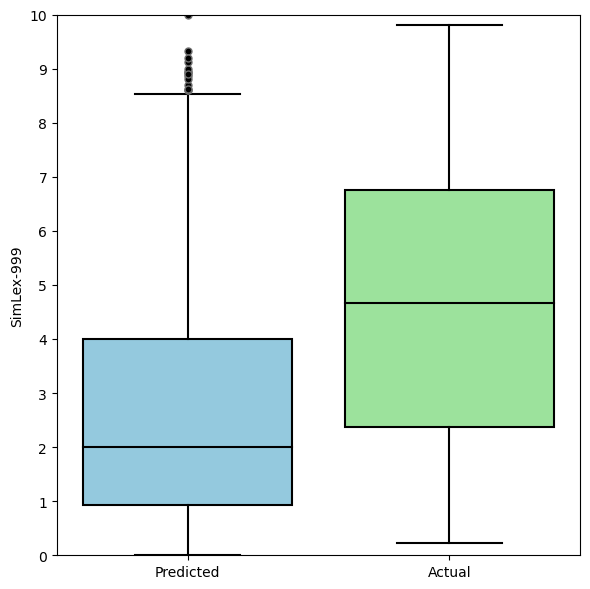

In [49]:
# Rename columns and copy
renamed_pred_sl = predicted.rename(columns={"pred_sl": "SimLex-999"}).copy()
renamed_act_sl = actual.rename(columns={"act_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_pred_sl['Score'] = 'Predicted'
renamed_act_sl['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_pred_sl, renamed_act_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

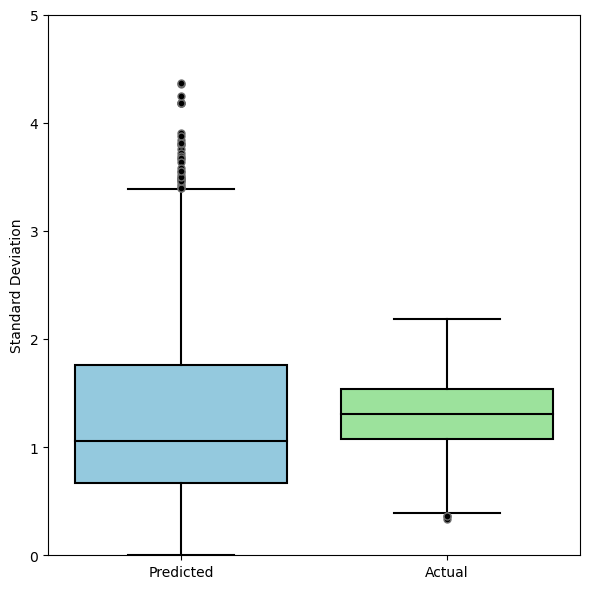

In [50]:
# Rename columns and copy
renamed_predicted_sd = predicted.rename(columns={"pred_sd": "Standard Deviation"}).copy()
renamed_actual_sd = actual.rename(columns={"act_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_predicted_sd['Score'] = 'Predicted'
renamed_actual_sd['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_predicted_sd, renamed_actual_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Distributions**

#### **4.1. SimLex-999**

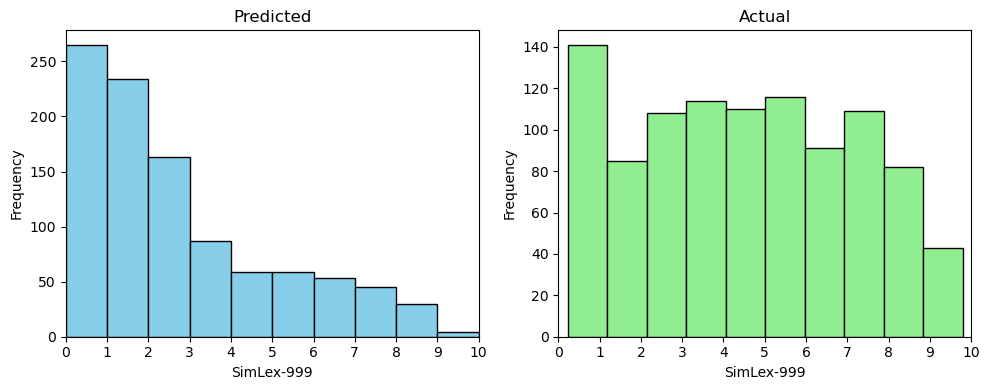

In [51]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot predicted histogram
axes[0].hist(renamed_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_act_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **4.2. Standard Deviation**

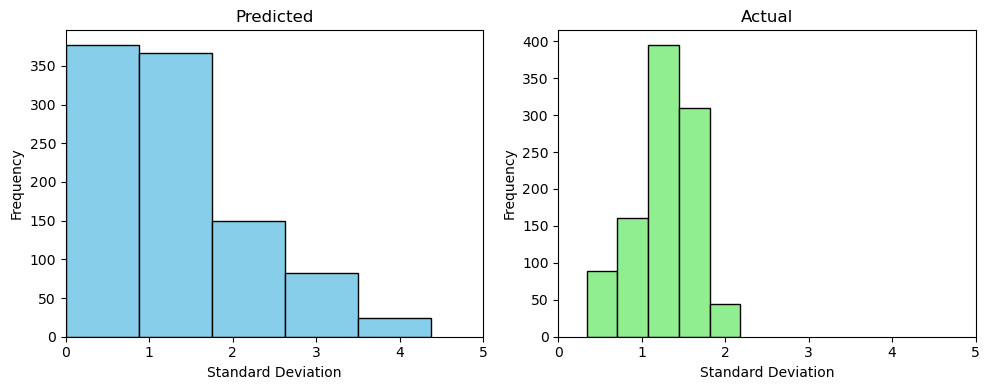

In [52]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot predicted histogram
axes[0].hist(renamed_predicted_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_actual_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **5. Outliers**

#### **5.1. Predicted**

In [53]:
# Count outliers
print_outlier_counts(predicted)

Outliers in pred_sl: 14
Outliers in pred_sd: 33


In [54]:
# Row outliers
print_outlier_data(predicted, 'pred_sl')


Outliers in pred_sl:
           word1      word2  pred_sl  pred_sd
22         quick      rapid     8.93     0.46
24     wonderful   terrific     8.70     0.59
30      apparent    obvious     8.60     0.51
31   inexpensive      cheap     8.87     0.55
42         large        big     8.80     2.24
121      student      pupil     8.60     0.63
140          cow     cattle     8.93     0.80
143         taxi        cab     9.33     0.72
162      hallway   corridor     8.99     0.51
175        beach   seashore     8.63     0.48
234     attorney     lawyer     8.90     0.54
442    adversary   opponent     9.13     0.30
781        occur     happen     9.20     0.86
782       vanish  disappear    10.00     0.00


In [55]:
# Row outliers
print_outlier_data(predicted, 'pred_sd')


Outliers in pred_sd:
              word1         word2  pred_sl  pred_sd
62          crucial     important     3.92     3.54
71          bizarre       strange     4.15     3.79
111            wife       husband     7.35     4.18
113           groom         bride     7.41     4.18
115           south         north     6.68     4.36
117           uncle          aunt     7.41     4.18
118           horse          mare     5.49     4.18
119          bottom           top     2.28     3.43
182        employer      employee     5.78     4.25
185         alcohol        brandy     5.09     3.76
186         victory       triumph     6.03     4.37
189           motel           inn     5.13     3.72
191           steak          meat     4.79     3.46
193            band     orchestra     5.32     3.90
198         alcohol           gin     4.94     3.66
243        molecule          atom     4.40     3.48
250           motor        engine     4.35     3.49
282   communication      language     2.89

#### **5.2. Actual**

In [56]:
# Count outliers
print_outlier_counts(actual)

Outliers in act_sd: 3
No outliers found in columns: act_sl


In [57]:
# Row outliers
print_outlier_data(actual, 'act_sd')


Outliers in act_sd:
         word1      word2  act_sl  act_sd
12        easy  difficult    0.58    0.36
727       task      woman    0.68    0.34
984  cooperate       join    5.18    0.36


#### **5.3. Add to Summary**

In [58]:
# Calculate outliers
outliers_pred_sl = calculate_outliers(predicted, 'pred_sl')
outliers_pred_sd = calculate_outliers(predicted, 'pred_sd')
outliers_act_sl = calculate_outliers(actual, 'act_sl')
outliers_act_sd = calculate_outliers(actual, 'act_sd')

# Count outliers
count_outliers_pred_sl = outliers_pred_sl.shape[0]
count_outliers_pred_sd = outliers_pred_sd.shape[0]
count_outliers_act_sl = outliers_act_sl.shape[0]
count_outliers_act_sd = outliers_act_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_pred_sl, count_outliers_act_sl, count_outliers_pred_sd, count_outliers_act_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,999.00,999.00,999.00,999.00
mean,2.71,4.56,1.30,1.27
std,2.33,2.61,0.89,0.37
min,0.00,0.23,0.00,0.34
25%,0.93,2.38,0.67,1.08
50%,2.00,4.67,1.06,1.31
75%,4.00,6.75,1.76,1.54
max,10.00,9.80,4.37,2.18
median,2.00,4.67,1.06,1.31
outliers,14.00,0.00,33.00,3.00


### **6. Correlation**

#### **6.1. SimLex-999 vs Standard Deviation**

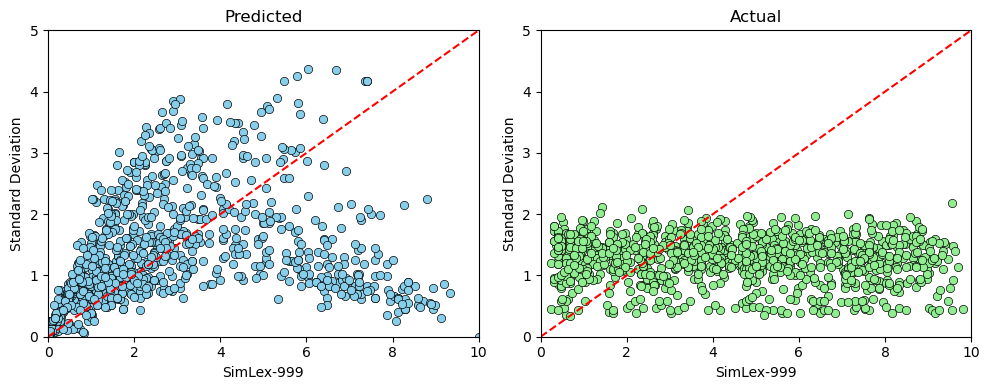

In [59]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='pred_sl', y='pred_sd', data=predicted, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('Predicted')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='act_sl', y='act_sd', data=actual, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('Actual')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [60]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(merged, 'pred_sl', 'pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(merged, 'act_sl', 'act_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,pred_sl,pred_sd,0.53400,9.987385e-75,significant
1,act_sl,act_sd,-0.04859,1.248691e-01,not significant


### **7. Evaluation Metrics**

#### **7.1. Spearmans's Rank Correlation**

##### **7.1.1. Actual SimLex-999 vs Predicted SimLex-999**

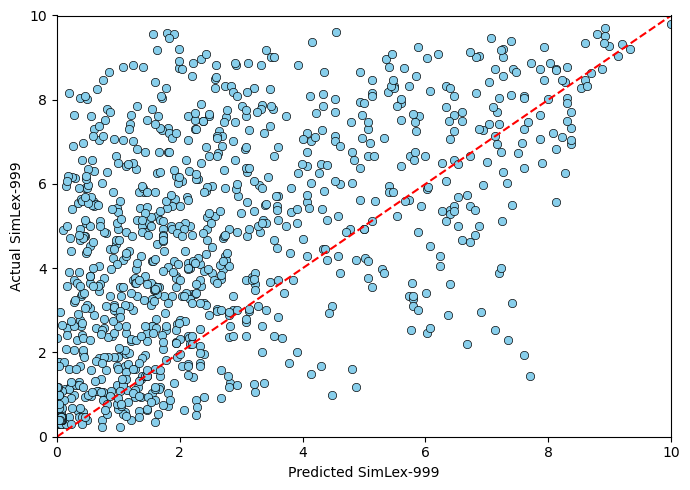

In [61]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sl', 'act_sl', 'Predicted SimLex-999', 'Actual SimLex-999', 0, 10, 0, 10)

In [62]:
# Correlation and pvalue
print_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Spearman's Rank correlation: 0.5655
P-value: 1.6656672086748788e-85
The correlation is statistically significant.



##### **7.1.2. Actual Standard Deviation vs Predicted Standard Deviation**

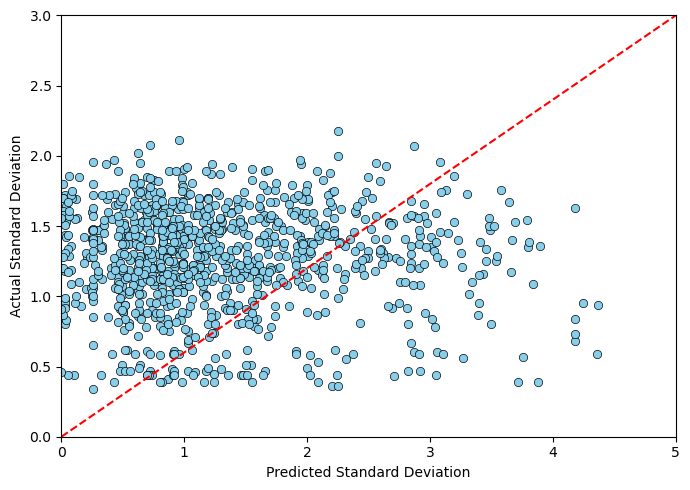

In [63]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sd', 'act_sd', 'Predicted Standard Deviation', 'Actual Standard Deviation', 0, 5, 0, 3)

In [64]:
# Correlation and p-value
print_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Spearman's Rank correlation: -0.00997
P-value: 0.7530680467595107
The correlation is not statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [65]:
# Calculate Mean Squared Error
mse = mean_squared_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 8.95


#### **7.3. Mean Absolute Error (MAE)**

In [66]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.30
